In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:01<00:00, 136MB/s]
100% 149M/149M [00:01<00:00, 135MB/s]


In [4]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [5]:
tr_df = get_class_paths('/content/Training')

In [6]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0923.jpg,notumor
1,/content/Training/notumor/Tr-no_0146.jpg,notumor
2,/content/Training/notumor/Tr-no_1491.jpg,notumor
3,/content/Training/notumor/Tr-no_1500.jpg,notumor
4,/content/Training/notumor/Tr-no_0363.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0237.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0783.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0557.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0968.jpg,pituitary


In [7]:
ts_df = get_class_paths('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0305.jpg,notumor
1,/content/Testing/notumor/Te-no_0155.jpg,notumor
2,/content/Testing/notumor/Te-no_0176.jpg,notumor
3,/content/Testing/notumor/Te-no_0091.jpg,notumor
4,/content/Testing/notumor/Te-no_0346.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary
1308,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0275.jpg,pituitary


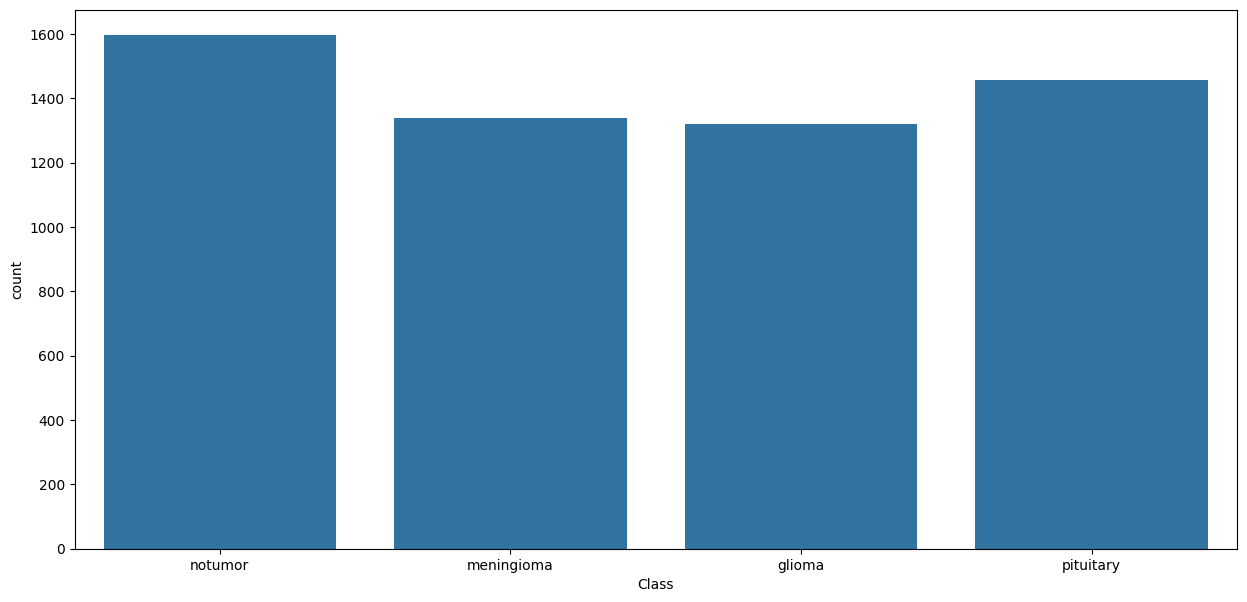

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=tr_df['Class'], data=tr_df)

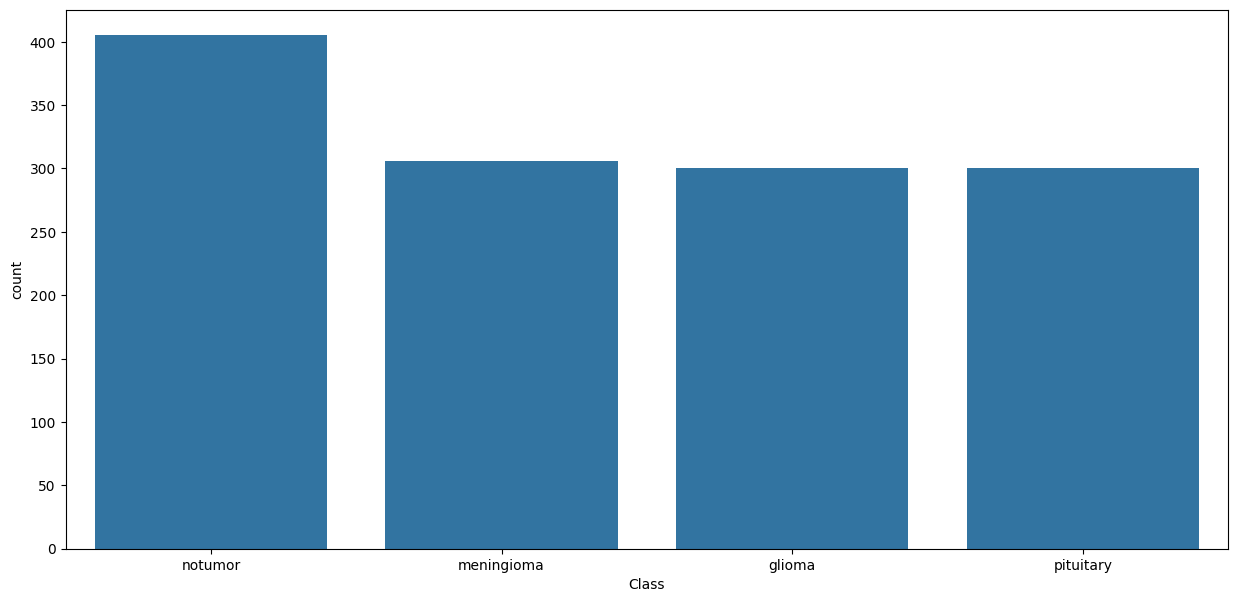

In [9]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=ts_df['Class'], data=ts_df)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adamax

In [11]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
812,/content/Testing/glioma/Te-gl_0121.jpg,glioma
451,/content/Testing/meningioma/Te-me_0247.jpg,meningioma
1045,/content/Testing/pituitary/Te-pi_0022.jpg,pituitary
1103,/content/Testing/pituitary/Te-pi_0241.jpg,pituitary
118,/content/Testing/notumor/Te-no_0275.jpg,notumor
...,...,...
568,/content/Testing/meningioma/Te-me_0176.jpg,meningioma
1254,/content/Testing/pituitary/Te-pi_0294.jpg,pituitary
662,/content/Testing/meningioma/Te-me_0241.jpg,meningioma
1080,/content/Testing/pituitary/Te-pi_0110.jpg,pituitary


In [13]:
ts_df

,Class Path,Class
356,/content/Testing/notumor/Te-no_0358.jpg,notumor
1042,/content/Testing/pituitary/Te-pi_0127.jpg,pituitary
638,/content/Testing/meningioma/Te-me_0075.jpg,meningioma
793,/content/Testing/glioma/Te-gl_0171.jpg,glioma
571,/content/Testing/meningioma/Te-me_0236.jpg,meningioma
...,...,...
937,/content/Testing/glioma/Te-gl_0077.jpg,glioma
720,/content/Testing/glioma/Te-gl_0021.jpg,glioma
1249,/content/Testing/pituitary/Te-pi_0270.jpg,pituitary
1008,/content/Testing/glioma/Te-gl_0085.jpg,glioma


In [14]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8,1.2))

ts_gen= ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


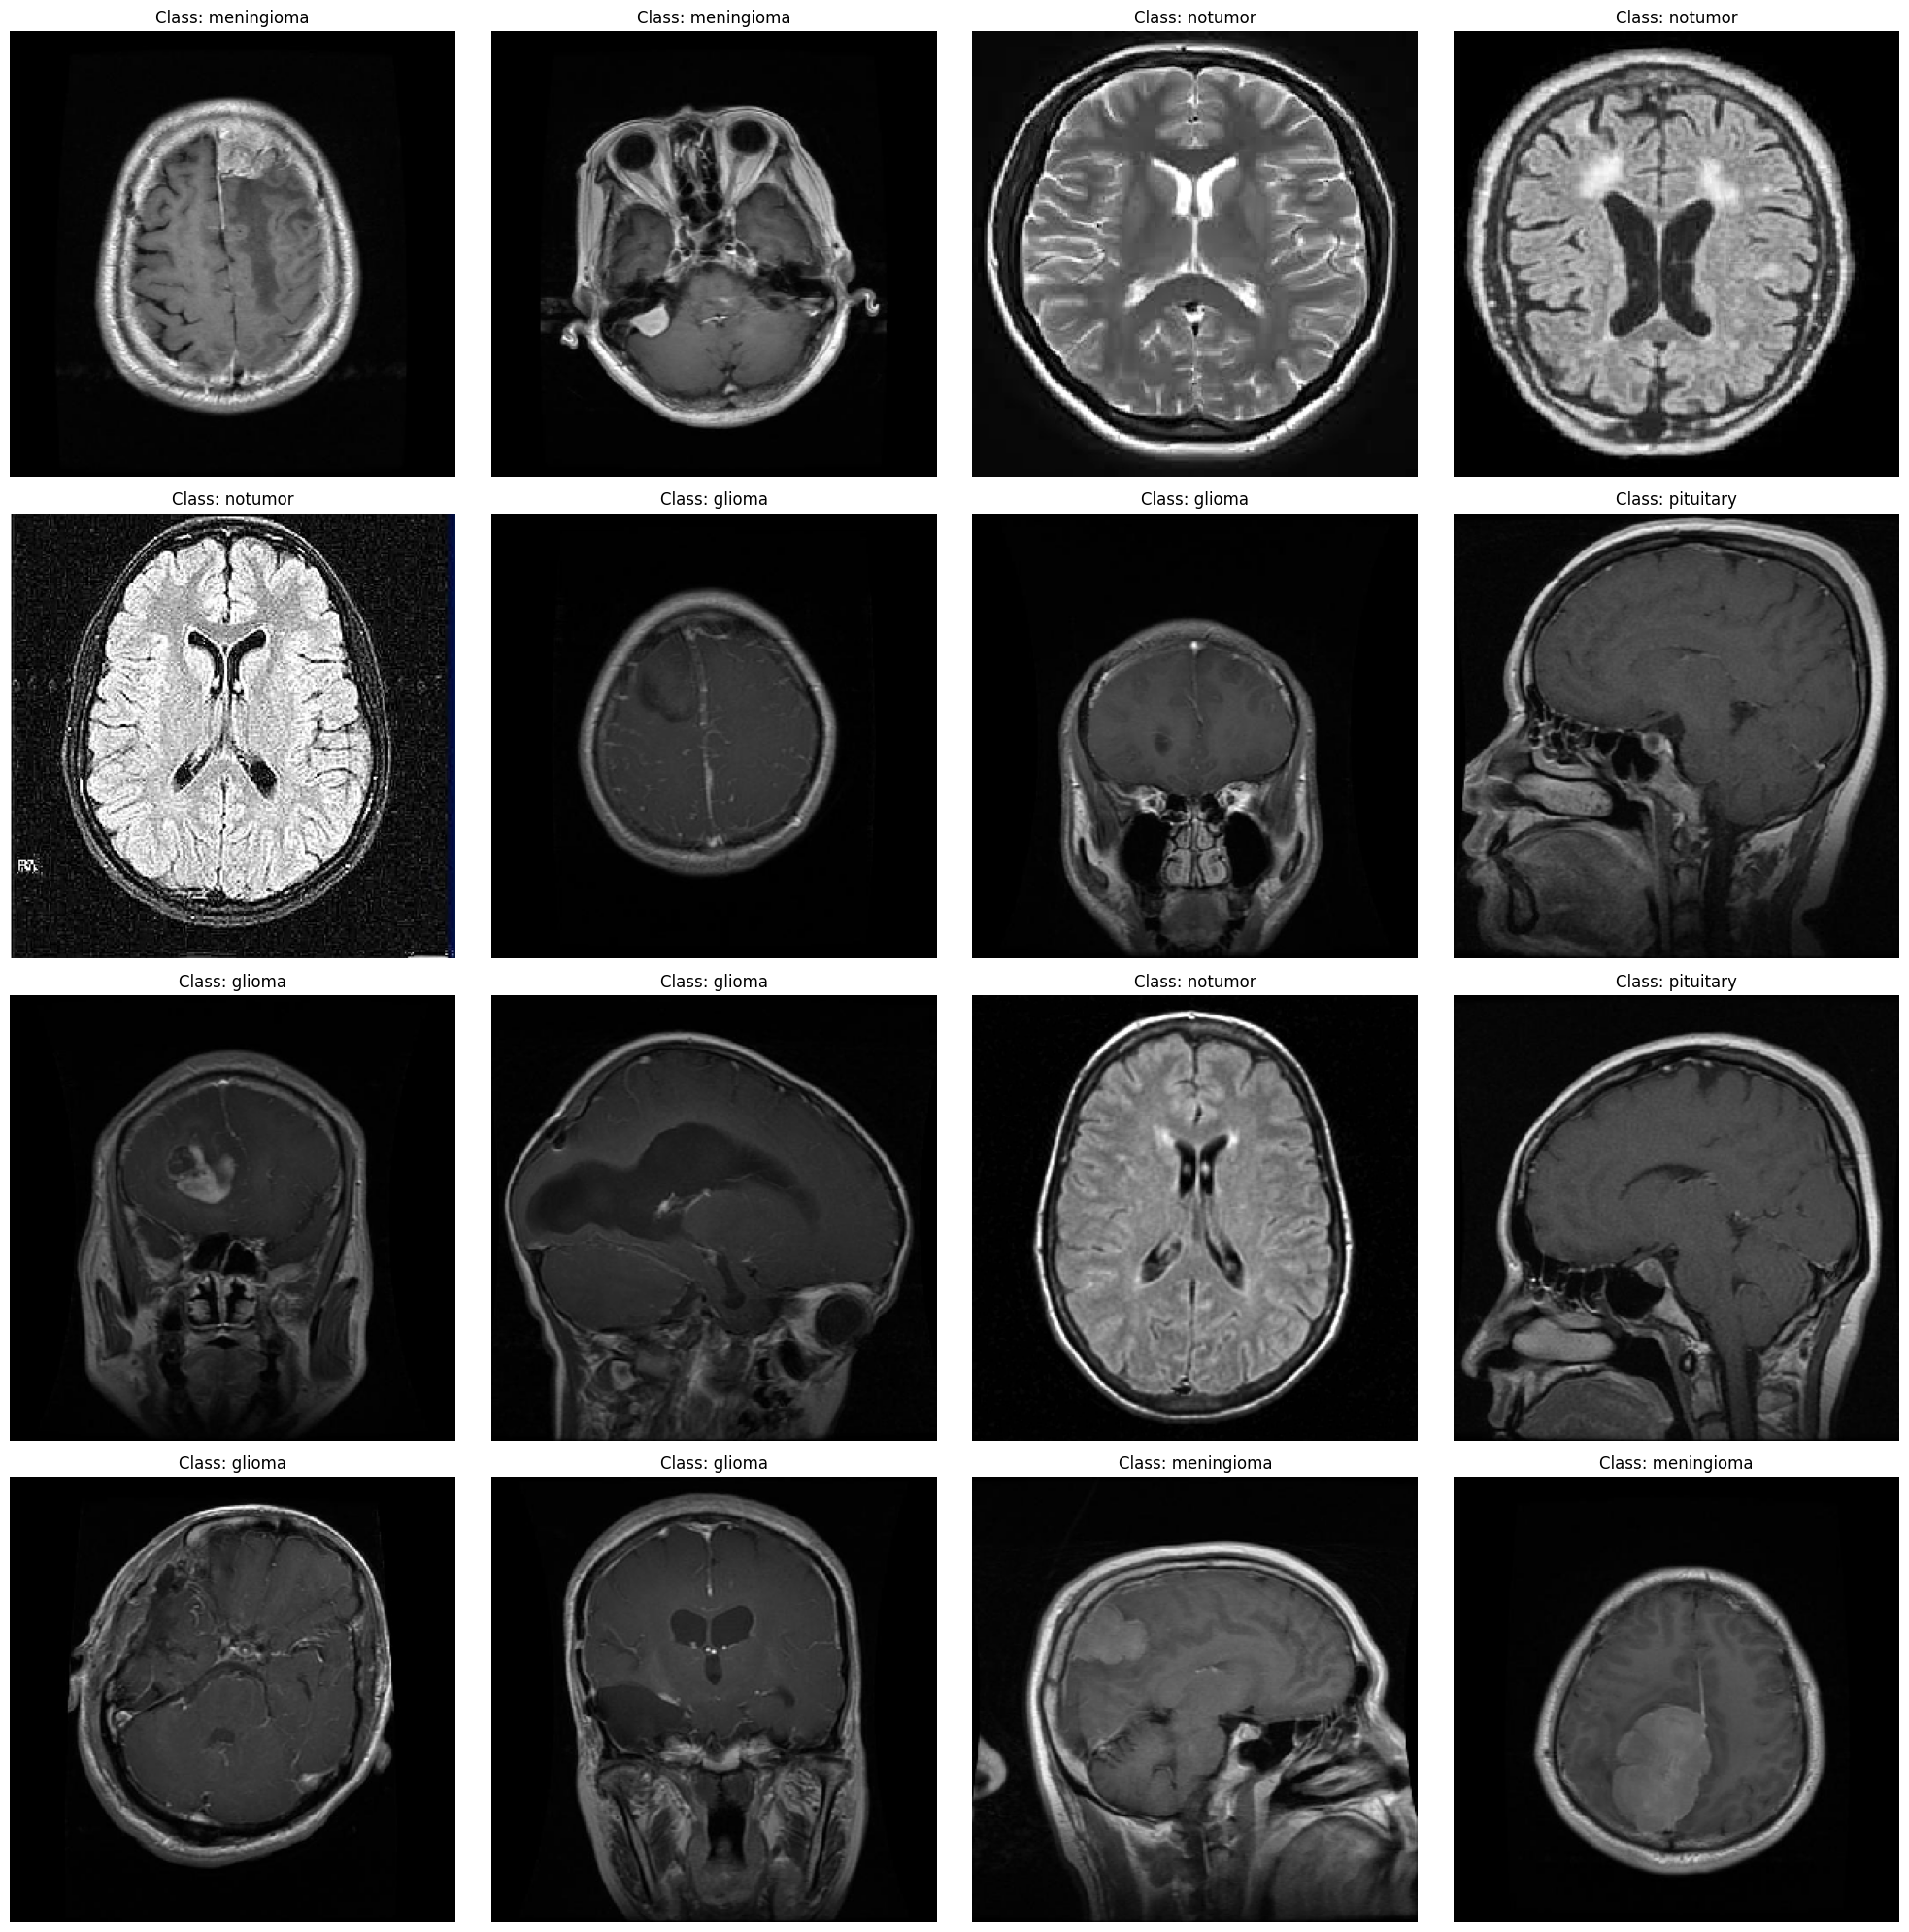

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  img = batch[0][0]
  label=batch[1][0]
  plt.imshow(img)

  class_index=np.argmax(label)
  class_names=list(tr_gen.class_indices.keys())
  class_indices=list(tr_gen.class_indices.values())

  index_position=class_indices.index(class_index)
  class_name=class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet',
                                               pooling='max')
model = Sequential([
        base_model,
        Flatten(),
        Dropout(0.3),
     Dense(128, activation='relu'),
     Dropout(0.25),
     Dense(4, activation='softmax')
])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [33]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.7430 - loss: 0.7236 - precision_1: 0.8276 - recall_1: 0.6365 - val_accuracy: 0.8809 - val_loss: 0.3358 - val_precision_1: 0.8814 - val_recall_1: 0.8733
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 831ms/step - accuracy: 0.9804 - loss: 0.0662 - precision_1: 0.9816 - recall_1: 0.9790 - val_accuracy: 0.9649 - val_loss: 0.0929 - val_precision_1: 0.9737 - val_recall_1: 0.9603
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 825ms/step - accuracy: 0.9934 - loss: 0.0216 - precision_1: 0.9940 - recall_1: 0.9932 - val_accuracy: 0.9832 - val_loss: 0.0737 - val_precision_1: 0.9832 - val_recall_1: 0.9832
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 827ms/step - accuracy: 0.9963 - loss: 0.0127 - precision_1: 0.9964 - recall_1: 0.9961 - val_accuracy: 0.9893 - val_loss: 0.0353 - val_precision_1: 0.9893 - val_recall_1: 0.9893
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 829ms/step - accuracy: 0.9949 - loss: 0.0161 - precision_1: 0.9956 - recall_1: 0.9948

Training Metrics: dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

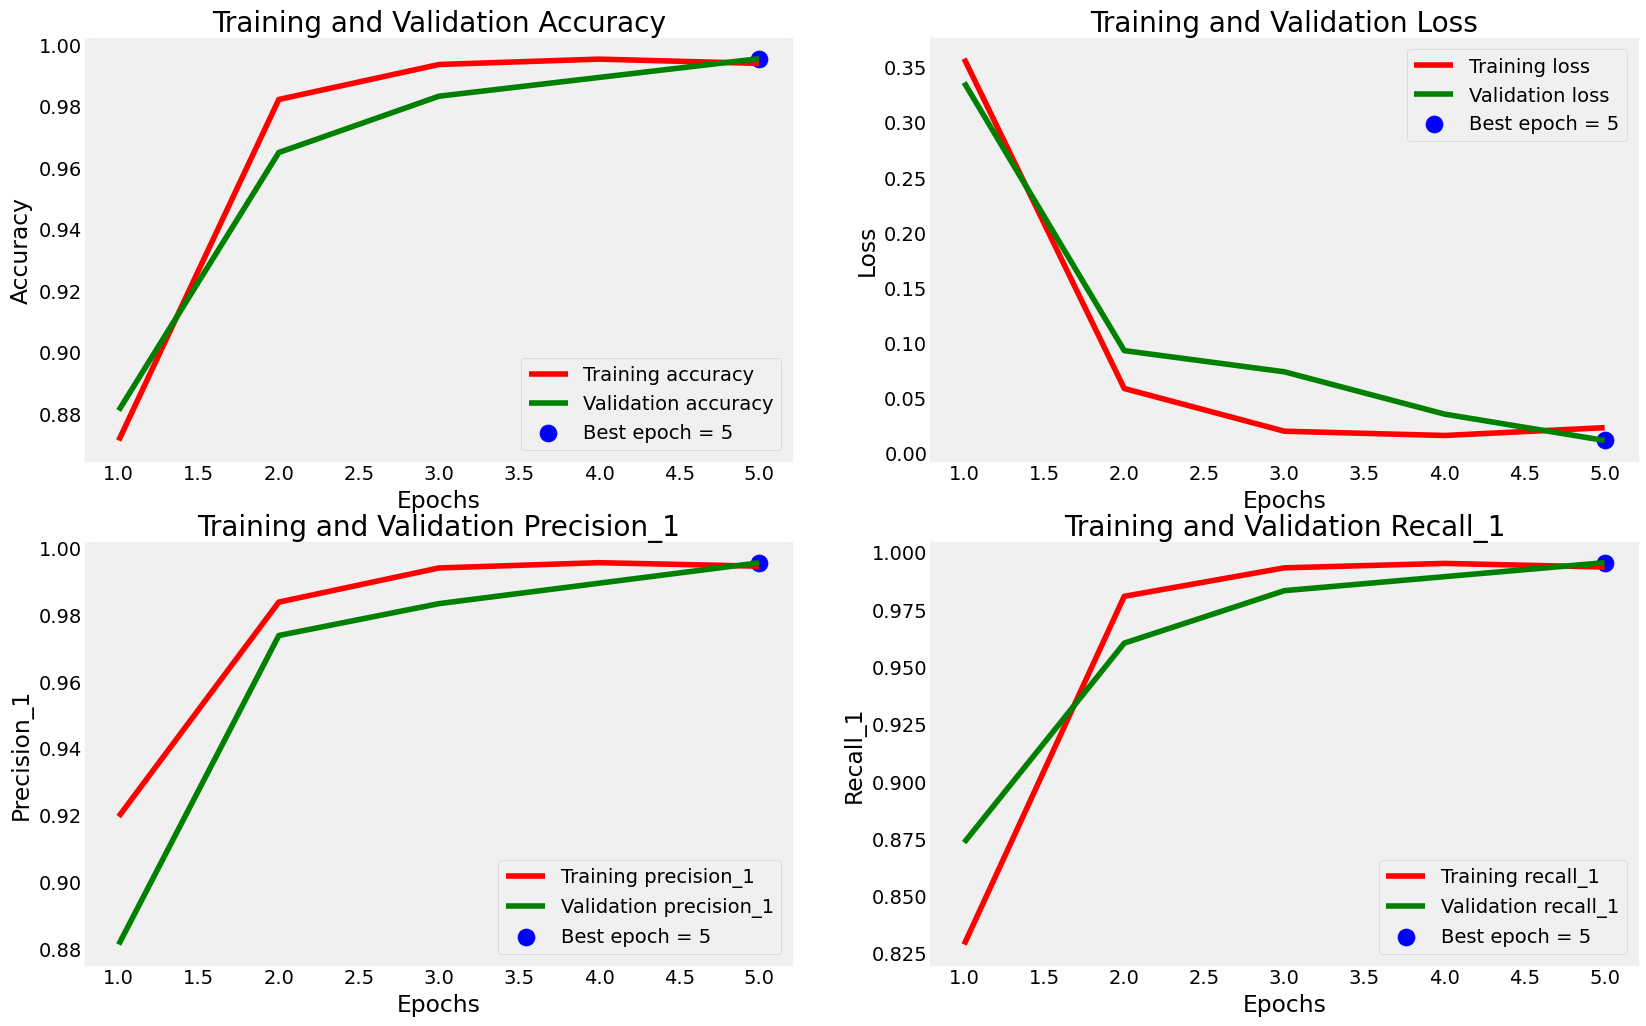

In [38]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
print(f'Training Metrics: {hist.history.keys()}')
tr_metrics= {m:hist.history[m] for m in metrics}
val_metrics= {m:hist.history[f'val_{m}'] for m in metrics}

best_epochs={}
best_values={}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, m in enumerate(metrics, 1):
  plt.subplot(2, 2, i)

  epochs=range(1, len(tr_metrics[m]) + 1)

  plt.plot(epochs, tr_metrics[m], 'r', label=f'Training {m}')
  plt.plot(epochs, val_metrics[m], 'g', label=f'Validation {m}')

  plt.scatter(best_epochs[m], best_values[m], s=150, color='blue',
              label=f'Best epoch = {best_epochs[m]}')
  plt.title(f'Training and Validation {m.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(m.title())
  plt.legend()
  plt.grid()


plt.subtitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [39]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'Training Accuracy: {train_score[1]*100:.2f}%')
print(f'Training Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f'\n\nTest Loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.9990 - loss: 0.0032 - precision_1: 0.9990 - recall_1: 0.9990
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.9878 - loss: 0.0156 - precision_1: 0.9878 - recall_1: 0.9878
 1/41 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 1.0000 - loss: 4.6620e-05 - precision_1: 1.0000 - recall_1: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9782 - loss: 0.0750 - precision_1: 0.9782 - recall_1: 0.9782
Training Accuracy: 99.89%
Training Loss: 0.0032


Validation Accuracy: 99.08%
Validation Loss: 0.0169


Test Loss: 0.0473


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step


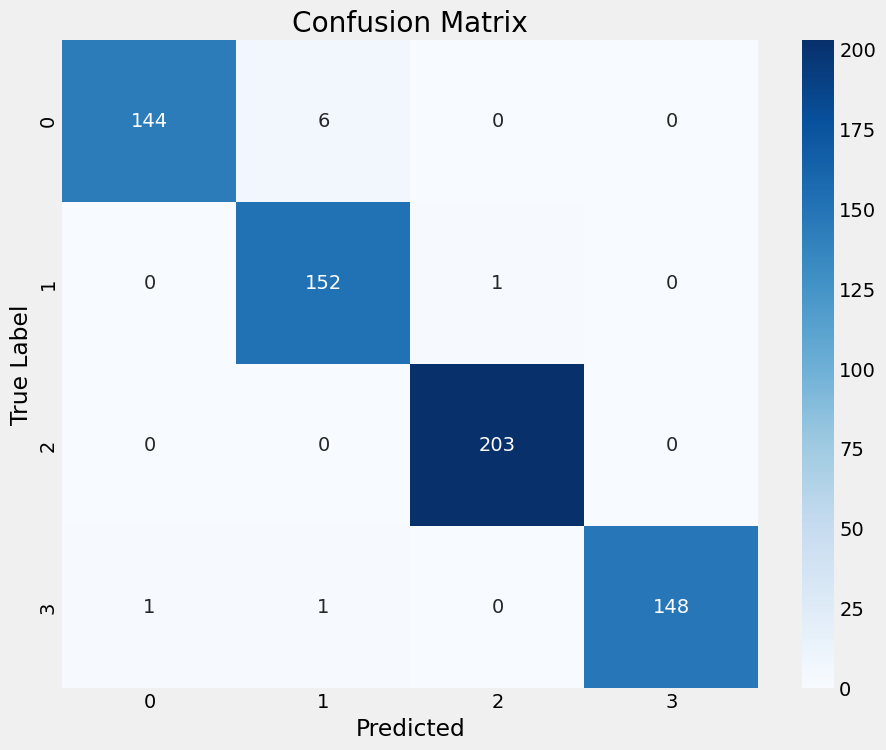

In [40]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0:'glioma',
    1:'meningioma',
    2:'no_tumor',
    3:'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from PIL import Image
def predict(img_path:str):
  labels = list(class_dict.values())
  plt.figure(figsize=(6, 8))
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array=np.asarray(resized_img)
  img_array=np.expand_dims(img_array, axis=0)/255.0

  predictions=model.predict(img_array)
  probabilities=list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class=class_dict[predicted_class_idx]

  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI \nPredicted: {predicted_class}')

  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability",fontsize=15)
  plt.title("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tutor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


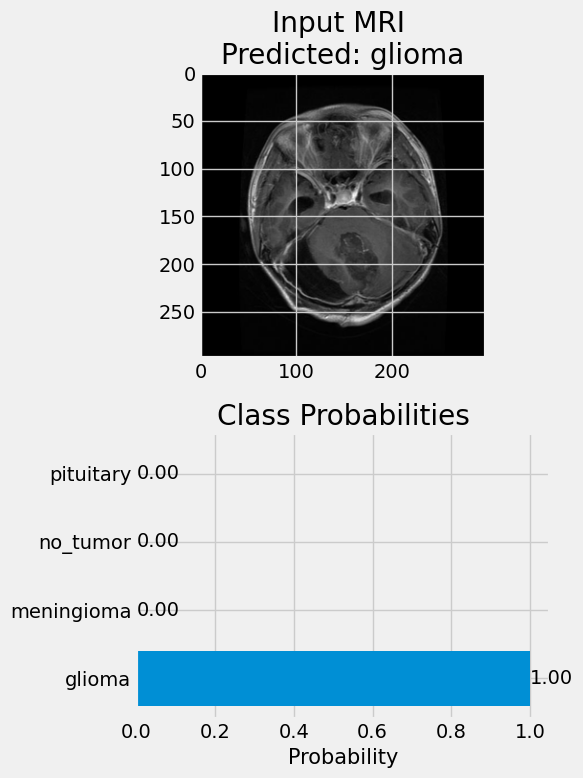


Predicted tutor type: glioma


In [42]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


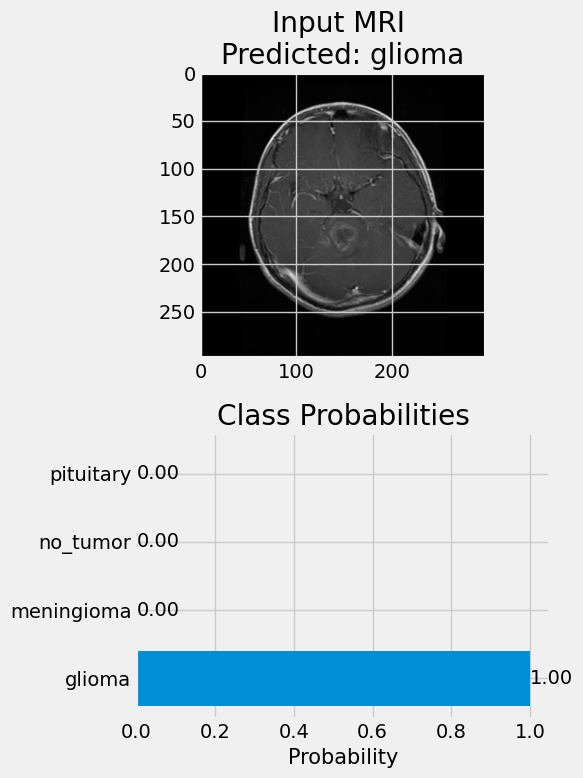


Predicted tutor type: glioma


In [43]:
predict('/content/Testing/glioma/Te-glTr_0007.jpg')

In [ ]:
# Look here i am not sure what
model.save_weights('xception_model.weights.h5')

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 32

img_size = (224, 224)
a = 5 + 2
image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8,1.2))

ts_gen= ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()
# txt='Iam not sure how it is'
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add (Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes
# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision() ,Recall()])
# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/179 ━━━━━━━━━━━━━━━━━━━━ 4:35:20 93s/step - accuracy: 0.2188 - loss: 6.3792 - precision: 0.0000e+00 - recall: 0.0000e+00

In [ ]:
metrics = ['accuracy', 'loss', 'precision_3', 'recall_3']
print(f'Training Metrics: {history.history.keys()}')
tr_metrics= {m:history.history[m] for m in metrics}
val_metrics= {m:history.history[f'val_{m}'] for m in metrics}

best_epochs={}
best_values={}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, m in enumerate(metrics, 1):
  plt.subplot(2, 2, i)

  epochs=range(1, len(tr_metrics[m]) + 1)

  plt.plot(epochs, tr_metrics[m], 'r', label=f'Training {m}')
  plt.plot(epochs, val_metrics[m], 'g', label=f'Validation {m}')

  plt.scatter(best_epochs[m], best_values[m], s=150, color='blue',
              label=f'Best epoch = {best_epochs[m]}')
  plt.title(f'Training and Validation {m.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(m.title())
  plt.legend()
  plt.grid()


plt.subtitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0:'glioma',
    1:'meningioma',
    2:'no_tumor',
    3:'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

In [1]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.7 MB/s eta 0:00:00


In [15]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [3]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [23]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [40]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f""" You are expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classity brain tumors
  as either glioma, meningioma, pitultary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.
  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
  in light cyan, these are the regions where the model is focusing on.
  - Explain possible reasons why the model made the prediction it did.
  those are the regions where the model is focusing on.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
  - Keep your explanation to 4 sentences max.

  Let's think step by step about this. Verify step by step.
  """
  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])
  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]
  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()
  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)
  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x- center[0])**2 + (y - center[1]) **2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask
  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0
  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  heatmap=cv2.resize(heatmap, img_size)

  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open (img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR) )
  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model=tf.keras.applications.Xception(include_top=False,weights='imagenet', input_shape=img_shape, pooling='max')
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128,activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file=st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model= load_xception_model('/content/xception_model.weights.h5')
    img_size= (299, 299)
  else:
    model =load_model('/content/cnn_model.h5')
    img_size=(224,224)
  labels=['Glioma','Meningioma','No Tumor','Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array=image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array/=255.0

  prediction=model.predict(img_array)
  class_index=np.argmax(prediction[0])
  result=labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}:{prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)
  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
  with col2:
   st.image(saliency_map, caption='Saliency Map', use_column_width=True)

  # st.write("## Classification Results")

  # result_container = st.container()
  # result_container = st.container()

  # result_container.markdown(
  #     f"""
  #       <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
  #         <div style= "display: flex; justity-content: Space-between; allign-items: center;">
  #           <div style:"flex: 1; text-align: center;>
  #             <h3 style="color:#ffffff; margin-bottom:10px; font-size:20px;">Prediction</h3>
  #             <p style="font-size:36 px; font-welght: 800; Color: #FF0000; margin: 0;">{result}</р>
  #             </div>
  #             <div style="width:2px; height:80px; background-color：#ffffff; margin: 0 20px;"></div>
  #             <div style="flex:1; text-align:center;">
  #               <h3 style="color: #ffffff; margin-bottom:10px; font-size:20px;">Confidence</h3>
  #               <p style="font-size:36 px; font-weight: 800; color: #2196F3; margin: 0;">
  #                 {prediction[0][class_index]:.4f%}
  #               </p>
  #           </div>
  #         </div>
  #       </div>
  #     """,
  #   unsafe_allow_html=True
  # )

  # probabilities = prediction[0]
  # sorted_indices = np.argsort(probabilities) [::-1]
  # sorted_labels = [labels[i] for i in sorted_indices]
  # sorted_probabilities = probabilities[sorted_indices]

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])


  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [34]:
thread = Thread(target=run_streamlit)
thread.start()

In [35]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL: ",public_url)

Public URL:  NgrokTunnel: "https://77f9-34-73-164-75.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Writing .env
